# <font color="maganta"><h3 align="center">Train Test Split Part 2</h3></font> 

<h2 style = "color:brown">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

from termcolor import colored
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

<h2 style = "color:brown" >Data Reading</h2>

In [2]:
df = pd.read_csv('Sales data.csv')
df.head()

,Unnamed: 0,Date,Sales
0,0,2015-01-04,14.934283
1,1,2015-01-11,7.234714
2,2,2015-01-18,27.953771
3,3,2015-01-25,50.460597
4,4,2015-02-01,20.316933


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head(3)

,Date,Sales
0,2015-01-04,14.934283
1,2015-01-11,7.234714
2,2015-01-18,27.953771


In [5]:
type(df.Date[1])

str

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    417 non-null    object 
 1   Sales   417 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


<h3 style = "color:indigo">Convert 'object' column into 'to_datetime' format</h3>

In [7]:
df['Date'] = pd.to_datetime(df['Date']).dt.floor('D')

In [8]:
type(df.Date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    417 non-null    datetime64[ns]
 1   Sales   417 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [10]:
df["DayOfYear"] = df["Date"].dt.dayofyear
df["WeekOfYear"] = df["Date"].dt.weekofyear
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [11]:
df.head()

,Date,Sales,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
0,2015-01-04,14.934283,4,1,6,1,2015
1,2015-01-11,7.234714,11,2,6,1,2015
2,2015-01-18,27.953771,18,3,6,1,2015
3,2015-01-25,50.460597,25,4,6,1,2015
4,2015-02-01,20.316933,32,5,6,2,2015


<h1 style = "color:green">Split Dataset for Training and Testing</h1>

In [12]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [13]:
train_data.tail()

,Date,Sales,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
328,2021-04-18,1657.482396,108,15,6,4,2021
329,2021-04-25,1662.566910,115,16,6,4,2021
330,2021-05-02,1654.755065,122,17,6,5,2021
331,2021-05-09,1642.054913,129,18,6,5,2021
332,2021-05-16,1666.516091,136,19,6,5,2021


In [14]:
test_data.head()

,Date,Sales,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
333,2021-05-23,1656.456766,143,20,6,5,2021
334,2021-05-30,1694.502395,150,21,6,5,2021
335,2021-06-06,1677.058852,157,22,6,6,2021
336,2021-06-13,1668.490056,164,23,6,6,2021
337,2021-06-20,1683.572283,171,24,6,6,2021


In [15]:
xtrain = train_data.drop(['Date','Sales'],axis=1)
ytrain = train_data["Sales"]
xtest = test_data.drop(['Date','Sales'],axis=1)
ytest = test_data["Sales"]

In [16]:
xtrain.shape, xtest.shape

((333, 5), (84, 5))

In [17]:
xtrain.tail()

,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
328,108,15,6,4,2021
329,115,16,6,4,2021
330,122,17,6,5,2021
331,129,18,6,5,2021
332,136,19,6,5,2021


In [18]:
xtest.head()

,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
333,143,20,6,5,2021
334,150,21,6,5,2021
335,157,22,6,6,2021
336,164,23,6,6,2021
337,171,24,6,6,2021


In [19]:
ytrain.tail()

328    1657.482396
329    1662.566910
330    1654.755065
331    1642.054913
332    1666.516091
Name: Sales, dtype: float64

In [20]:
ytest.head()

333    1656.456766
334    1694.502395
335    1677.058852
336    1668.490056
337    1683.572283
Name: Sales, dtype: float64

<h1 style = "color:green">Implementing Linear Regression</h1>

In [21]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [22]:
y_pred = model.predict(xtest)

<h2 style = "color:green">Visualization: Actual vs Predicted Sales of Test Data</h2>

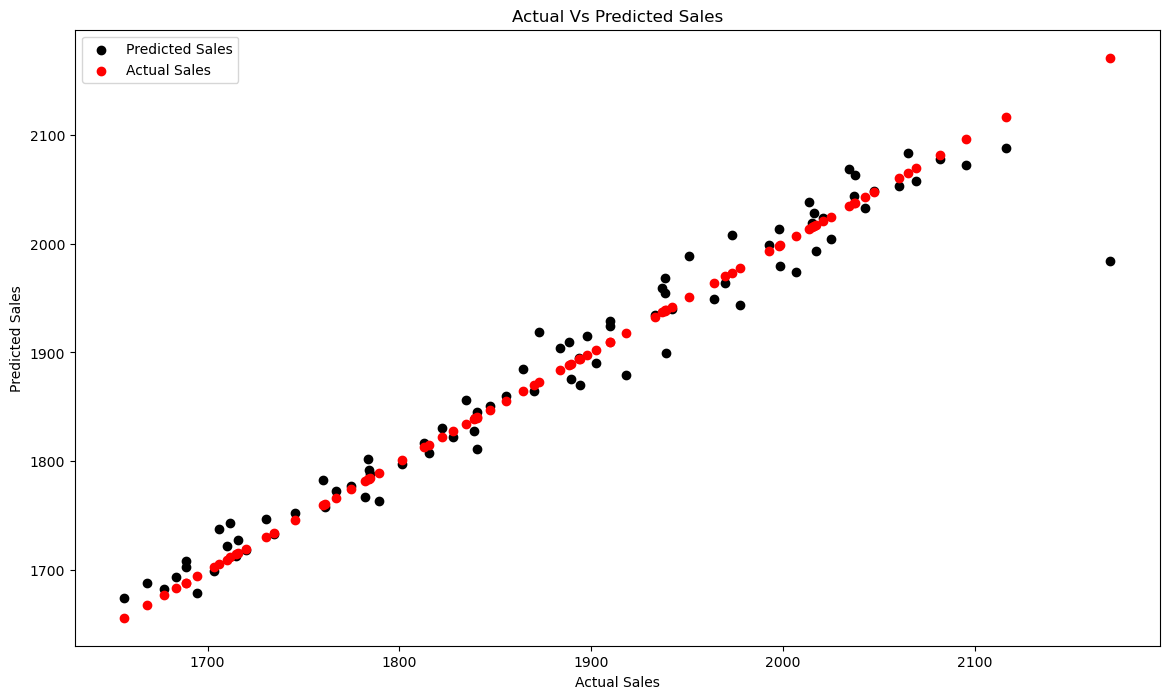

In [23]:
plt.figure(figsize=(14, 8)) 

plt.scatter(ytest, y_pred, color='black', label = 'Predicted Sales')  # actual y and predicted
plt.scatter(ytest, ytest, color='red', label = "Actual Sales") # 
plt.title("Actual Vs Predicted Sales") 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales")
plt.legend()
plt.show()

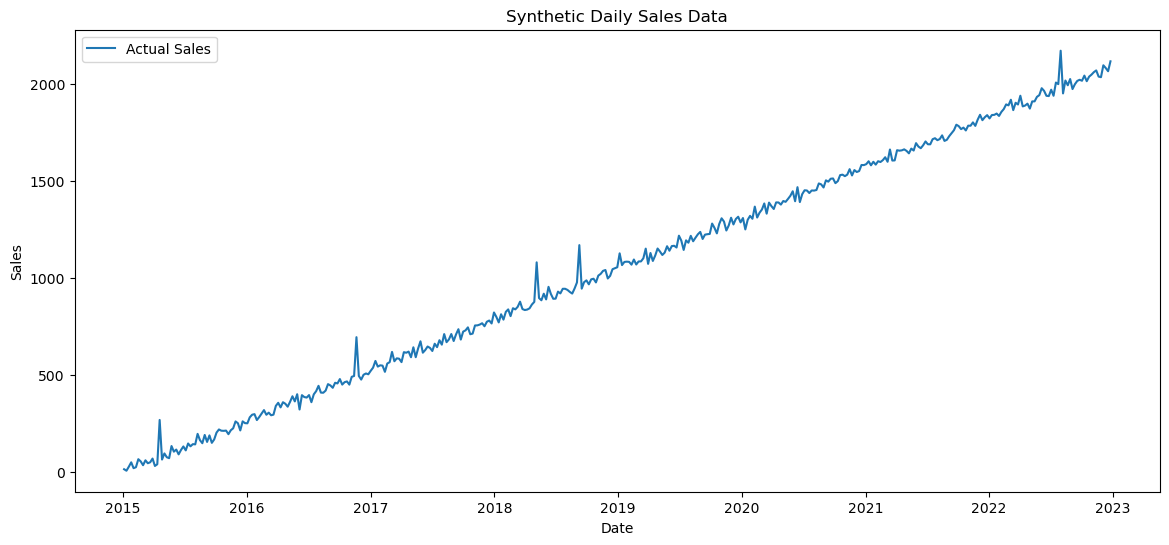

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales") #line chart
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

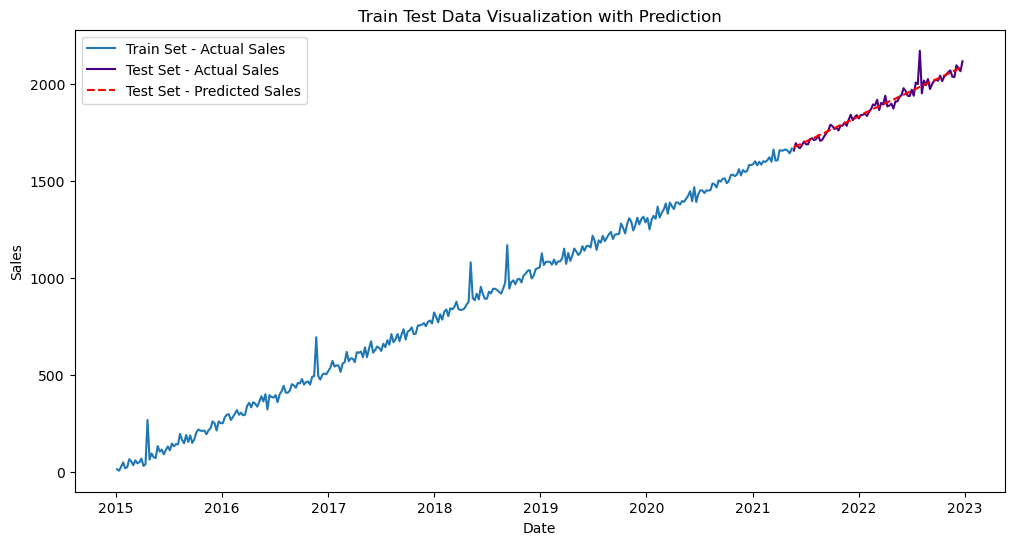

In [25]:
plt.figure(figsize=(12, 6))
#plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.plot(train_data["Date"], train_data["Sales"], label="Train Set - Actual Sales", color = 'tab:blue')
plt.plot(test_data["Date"], ytest, label="Test Set - Actual Sales",color='indigo')
plt.plot(test_data["Date"], y_pred, label="Test Set - Predicted Sales", linestyle="--", color = 'red')
plt.title("Train Test Data Visualization with Prediction") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()
plt.show()